# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in this lab's data folder.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [154]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [5]:
temp=pd.read_csv("data/Temp_States.csv",sep=";")

#### Print `temp`.

In [8]:
temp

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
1,Albany,New York,9.444444,NaN
2,Buffalo,New York,3.333333,NaN
3,Hartford,Connecticut,17.222222,NaN
4,Bridgeport,Connecticut,14.444444,NaN
5,Treton,New Jersey,22.222222,NaN
6,Newark,New Jersey,20.000000,NaN


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [9]:
temp.dtypes

City            object
State           object
Temperature    float64
Unnamed: 3     float64
dtype: object

#### Select the rows where state is New York.

In [10]:
newyork=temp["State"]=="New York"
temp.loc[newyork,:]

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
1,Albany,New York,9.444444,NaN
2,Buffalo,New York,3.333333,NaN


#### What is the average temperature of cities in New York?

In [12]:
temp.loc[newyork,"Temperature"].mean()

10.740740739000001

#### Which states and cities have a temperature above 15 degrees Celsius?

In [22]:
#Cities above 15 degrees Celsius
temp_above_15=temp["Temperature"]>15
temp.loc[temp_above_15,["City","State","Temperature"]]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [21]:
#States above 15 degrees Celsius
groupbystate=temp.groupby("State").mean()
states_above_15=groupbystate["Temperature"]>15
groupbystate.loc[states_above_15,"Temperature"]

State
Connecticut    15.833333
New Jersey     21.111111
Name: Temperature, dtype: float64

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [24]:
#Cities above 15 degrees Celsius
temp_above_15=temp["Temperature"]>15
temp.loc[temp_above_15,["City","Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [25]:
temp_15_20=(temp["Temperature"]>15)&(temp["Temperature"]<20)
temp.loc[temp_15_20,["City","State","Temperature"]]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [29]:
temp.groupby("State").agg(["mean","std"])["Temperature"]

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [33]:
employees=pd.read_csv("data/employees.csv",sep=";")

In [50]:
employees

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN
3,Sonia,HR,Bachelor,F,analyst,4,35,NaN
4,Samuel,Sales,Master,M,associate,3,55,NaN
5,Eva,Sales,Bachelor,F,associate,2,55,NaN
6,Carlos,IT,Master,M,VP,8,70,NaN
7,Pedro,IT,Phd,M,associate,7,60,NaN
8,Ana,HR,Master,F,VP,8,70,NaN


#### Explore the data types of the `employees` dataframe. Comment your results.

In [34]:
employees.dtypes

Name           object
Department     object
Education      object
Gender         object
Title          object
Years           int64
Salary          int64
Unnamed: 7    float64
dtype: object

#### What's the average salary in this company?

In [35]:
employees["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [36]:
employees["Salary"].max()

70

#### What's the lowest salary?

In [37]:
employees["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [40]:
min_salary=employees["Salary"]==employees["Salary"].min()
employees.loc[min_salary,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### Find all the information about an employee called David.

In [46]:
david=employees["Name"]=="David"
employees.loc[david,:]

array([['David', 'HR', 'Master', 'M', 'analyst', 2, 30, nan]],
      dtype=object)

#### Could you return only David's salary?

In [48]:
employees.loc[david,"Salary"].values[0]

30

#### Print all the rows where job title is associate.

In [51]:
associate=employees["Title"]=="associate"
employees.loc[associate,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
4,Samuel,Sales,Master,M,associate,3,55,NaN
5,Eva,Sales,Bachelor,F,associate,2,55,NaN
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [52]:
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


In [54]:
employees.iloc[0:3,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### Find the employees whose title is associate and whose salary is above 55.

In [55]:
salary_above_55=employees["Salary"]>55
employees.loc[salary_above_55 & associate,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [62]:
employees.groupby("Years").mean().reset_index()[["Years","Salary"]]

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average salary per title?

In [65]:
employees.groupby("Title").mean().reset_index()[["Title","Salary"]]

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


####  Find the salary quartiles.


In [78]:
employees["Salary"].describe().loc[["25%",'50%',"75%"]]

25%    35.0
50%    55.0
75%    60.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [67]:
employees.groupby("Gender").mean().reset_index()[["Gender","Salary"]]

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [81]:
employees.groupby("Department").agg(["min","mean","max"])

Years               Salary            Unnamed: 7         
             min      mean max    min   mean max        min mean max
Department                                                          
HR             2  4.666667   8     30  45.00  70        NaN  NaN NaN
IT             1  4.500000   8     30  48.75  70        NaN  NaN NaN
Sales          2  2.500000   3     55  55.00  55        NaN  NaN NaN

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [88]:
groupby_department=employees.groupby("Department").agg(["min","mean","max"])
department_diff=groupby_department["Salary"]["max"]-groupby_department["Salary"]["min"]
department_diff

Department
HR       40
IT       40
Sales     0
dtype: int64

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [92]:
orders=pd.read_csv("data/Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [93]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [94]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average purchase price?

In [96]:
orders["UnitPrice"].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [98]:
orders["UnitPrice"].min()

0.0

In [99]:
orders["UnitPrice"].max()

8142.75

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [103]:
spain=orders["Country"]=="Spain"
orders.loc[spain,"CustomerID"].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [104]:
len(orders.loc[spain,"CustomerID"].unique())

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [112]:
groupby_customers=orders.groupby('CustomerID').sum().reset_index()[["CustomerID","Quantity"]]
qtd_higher_50=groupby_customers["Quantity"]>50
groupby_customers.loc[qtd_higher_50,"CustomerID"]

0       12346
1       12347
2       12348
3       12349
4       12350
        ...  
4333    18278
4335    18281
4336    18282
4337    18283
4338    18287
Name: CustomerID, Length: 4091, dtype: int64

#### Select orders from Spain that include more than 50 items.

In [121]:
groupby_order_country=orders.groupby(["InvoiceNo","Country"]).sum().reset_index()[["InvoiceNo","Country","Quantity"]]
orders_spain=groupby_order_country["Country"]=="Spain"
orders_above_50=groupby_order_country["Quantity"]>50
groupby_order_country.loc[orders_above_50 & orders_spain,:]

,InvoiceNo,Country,Quantity
275,536944,Spain,400
748,538095,Spain,67
894,538525,Spain,300
1231,539351,Spain,100
1562,540469,Spain,630
...,...,...,...
17174,578321,Spain,920
17185,578339,Spain,77
17645,579503,Spain,117
18245,580955,Spain,182


#### Select all free orders.

In [126]:
groupby_orders=orders.groupby("InvoiceNo").sum()
groupby_orders.loc[groupby_orders["amount_spent"]==0,:].index

Int64Index([543599, 564651, 568384, 578841], dtype='int64', name='InvoiceNo')

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [148]:
lunch_bag=orders["Description"].apply(lambda x: True if re.match("lunch bag", x) is not None else False)
orders.loc[lunch_bag,"InvoiceNo"]

93        536378
172       536385
354       536401
359       536401
360       536401
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11556, dtype: int64

#### Select all `lunch bag` orders made in 2011.

In [149]:
orders_2011=orders["year"]==2011
orders.loc[lunch_bag & orders_2011,"InvoiceNo"]

26340     540015
26341     540015
26512     540023
26513     540023
26860     540098
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11234, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

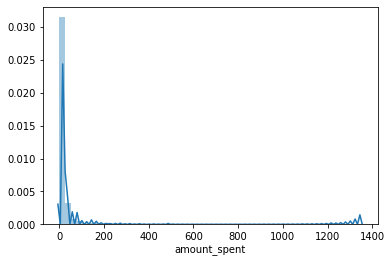

In [159]:
sns.distplot(orders.loc[spain,"amount_spent"])

#### Select all orders made in the month of August.

In [161]:
august=orders["month"]==8
orders.loc[august,"InvoiceNo"].unique()

array([561904, 561905, 561906, ..., 565014, 565056, 565067], dtype=int64)

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [164]:
orders.loc[august,"Country"].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [167]:
orders.groupby("Country").mean()["amount_spent"]

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [174]:
orders.groupby("StockCode").mean()["UnitPrice"].sort_values(ascending=False).iloc[0]

744.1475

#### What is the average amount spent per year?

In [177]:
orders.groupby("year").mean()["amount_spent"]

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64